In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../data/data.csv')

In [3]:
df.head()

Timestamp  Age  Gender         Country state self_employed  \
0  2014-08-27 11:29:31   37  Female   United States    IL           NaN   
1  2014-08-27 11:29:37   44       M   United States    IN           NaN   
2  2014-08-27 11:29:44   32    Male          Canada   NaN           NaN   
3  2014-08-27 11:29:46   31    Male  United Kingdom   NaN           NaN   
4  2014-08-27 11:30:22   31    Male   United States    TX           NaN   

  family_history treatment work_interfere    no_employees  ...  \
0             No       Yes          Often            6-25  ...   
1             No        No         Rarely  More than 1000  ...   
2             No        No         Rarely            6-25  ...   
3            Yes       Yes          Often          26-100  ...   
4             No        No          Never         100-500  ...   

                leave mental_health_consequence phys_health_consequence  \
0       Somewhat easy                        No                      No   
1          Don't know                     Maybe                      No   
2  Somewhat difficult                        No                      No   
3  Somewhat difficult                       Yes                     Yes   
4          Don't know                        No                      No   

      coworkers supervisor mental_health_interview phys_health_interview  \
0  Some of them        Yes                      No                 Maybe   
1            No         No                      No                    No   
2           Yes        Yes                     Yes                   Yes   
3  Some of them         No                   Maybe                 Maybe   
4  Some of them        Yes                     Yes                   Yes   

  mental_vs_physical obs_consequence comments  
0                Yes              No      NaN  
1         Don't know              No      NaN  
2                 No              No      NaN  
3                 No             Yes      NaN  
4         Don't know              No      NaN  

[5 rows x 27 columns]

In [4]:
df.shape

(1259, 27)

In [5]:
df.describe().T

count          mean           std     min   25%   50%   75%  \
Age  1259.0  7.942815e+07  2.818299e+09 -1726.0  27.0  31.0  36.0   

              max  
Age  1.000000e+11

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [7]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

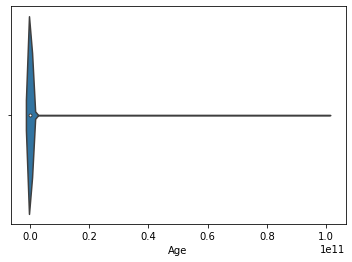

In [8]:
# sns.set_theme(style="whitegrid")
ax = sns.violinplot(x=df.Age)

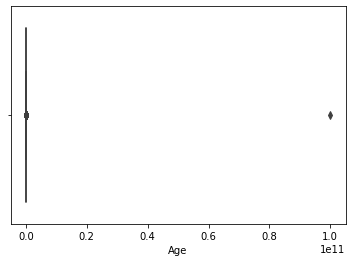

In [9]:
# sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=df.Age)

# Replacing outlier in Age with median

In [10]:
df.Age[df.Age<20]

43        18
75        19
93        18
118       18
129       19
143      -29
150       19
282       18
287       18
478       18
482       18
592       19
682       19
715    -1726
734        5
749       19
989        8
991       19
1020      19
1027      19
1090      11
1127      -1
Name: Age, dtype: int64

In [11]:
# Replacing age below 0 with median
df.Age.median()

31.0

In [12]:
df.Age = df.Age.map(lambda x: x if x>0 else df.Age.median())

In [13]:
df.Age[df.Age>100]

364    3.290000e+02
390    1.000000e+11
Name: Age, dtype: float64

In [14]:
df.Age = df.Age.map(lambda x: x if x<100 else df.Age.median())

In [15]:
df.Age[df.Age>100]

Series([], Name: Age, dtype: float64)

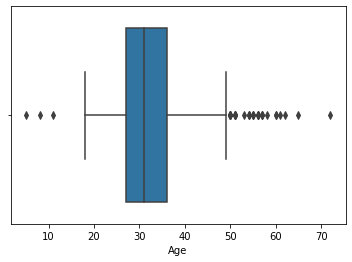

In [16]:
ax = sns.boxplot(x=df.Age)

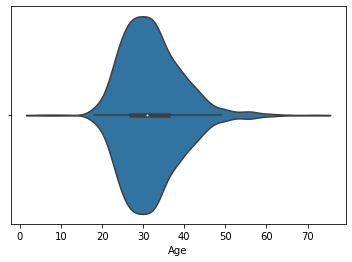

In [30]:
ax = sns.violinplot(x=df.Age)

In [35]:
df.no_employees.unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

In [37]:
df.state.unique()

array(['IL', 'IN', nan, 'TX', 'TN', 'MI', 'OH', 'CA', 'CT', 'MD', 'NY',
       'NC', 'MA', 'IA', 'PA', 'WA', 'WI', 'UT', 'NM', 'OR', 'FL', 'MN',
       'MO', 'AZ', 'CO', 'GA', 'DC', 'NE', 'WV', 'OK', 'KS', 'VA', 'NH',
       'KY', 'AL', 'NV', 'NJ', 'SC', 'VT', 'SD', 'ID', 'MS', 'RI', 'WY',
       'LA', 'ME'], dtype=object)

## Country

In [19]:
df.Country.unique()

array(['United States', 'Canada', 'United Kingdom', 'Bulgaria', 'France',
       'Portugal', 'Netherlands', 'Switzerland', 'Poland', 'Australia',
       'Germany', 'Russia', 'Mexico', 'Brazil', 'Slovenia', 'Costa Rica',
       'Austria', 'Ireland', 'India', 'South Africa', 'Italy', 'Sweden',
       'Colombia', 'Latvia', 'Romania', 'Belgium', 'New Zealand',
       'Zimbabwe', 'Spain', 'Finland', 'Uruguay', 'Israel',
       'Bosnia and Herzegovina', 'Hungary', 'Singapore', 'Japan',
       'Nigeria', 'Croatia', 'Norway', 'Thailand', 'Denmark',
       'Bahamas, The', 'Greece', 'Moldova', 'Georgia', 'China',
       'Czech Republic', 'Philippines'], dtype=object)

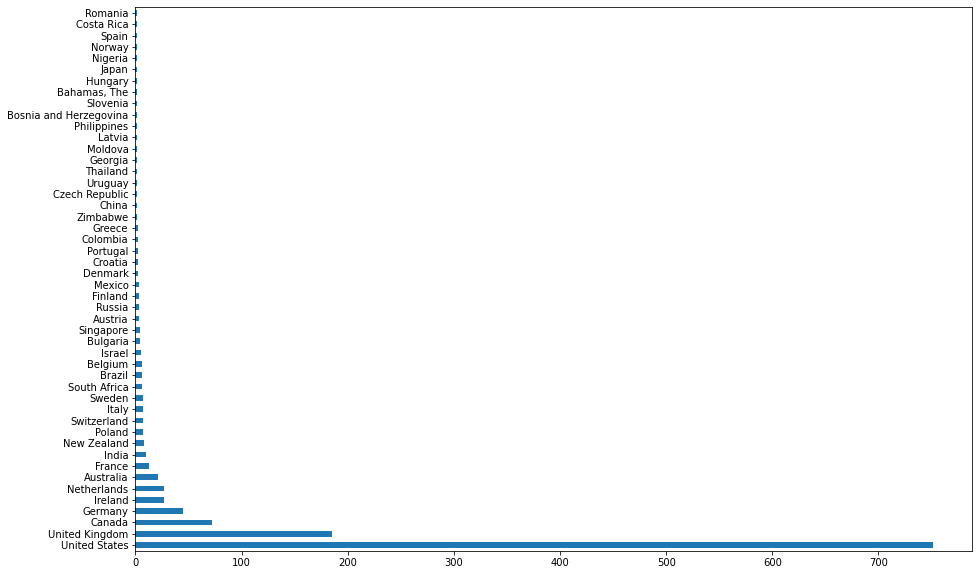

In [26]:
pd.value_counts(df['Country']).plot.barh(figsize=(15,10))

## Self Employed

In [28]:
df.self_employed.isnull().sum()

18

In [29]:
df.self_employed.value_counts()

No     1095
Yes     146
Name: self_employed, dtype: int64

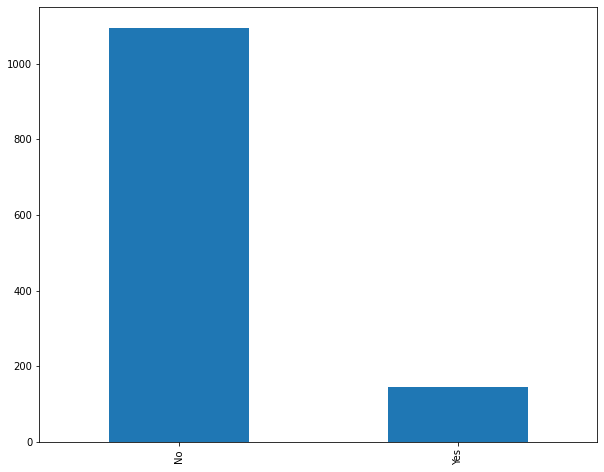

In [34]:
pd.value_counts(df['self_employed']).plot.bar(figsize=(10,8))

## Treatment

In [35]:
df.treatment.isnull().sum()

0

In [36]:
df.treatment.value_counts()

Yes    637
No     622
Name: treatment, dtype: int64

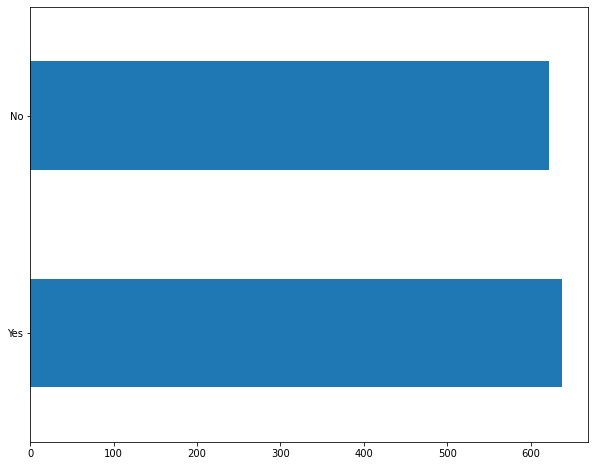

In [39]:
pd.value_counts(df['treatment']).plot.barh(figsize=(10,8))

# Number of employee

In [40]:
df.no_employees.isnull().sum()

0

In [41]:
df.no_employees.value_counts()

6-25              290
26-100            289
More than 1000    282
100-500           176
1-5               162
500-1000           60
Name: no_employees, dtype: int64

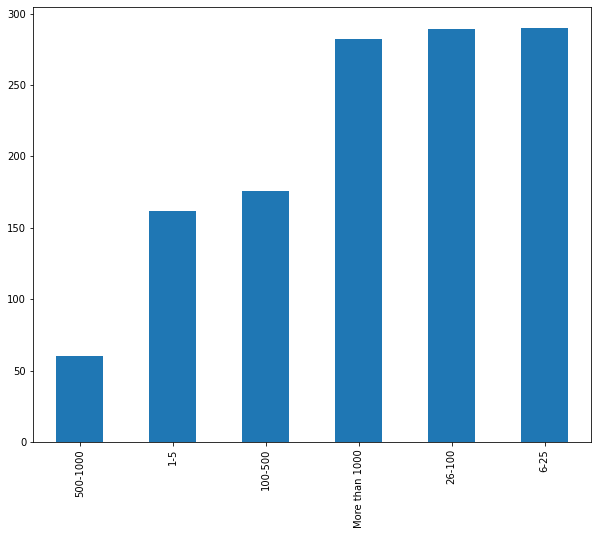

In [46]:
pd.value_counts(df['no_employees']).sort_values(ascending=True).plot.bar(sort_columns=False, figsize=(10,8))

In [51]:
(df['no_employees']).value_counts().sort_index()

1-5               162
100-500           176
26-100            289
500-1000           60
6-25              290
More than 1000    282
Name: no_employees, dtype: int64

## Technology Company

In [52]:
df.tech_company.isnull().sum()

0

In [53]:
df.tech_company.value_counts()

Yes    1031
No      228
Name: tech_company, dtype: int64

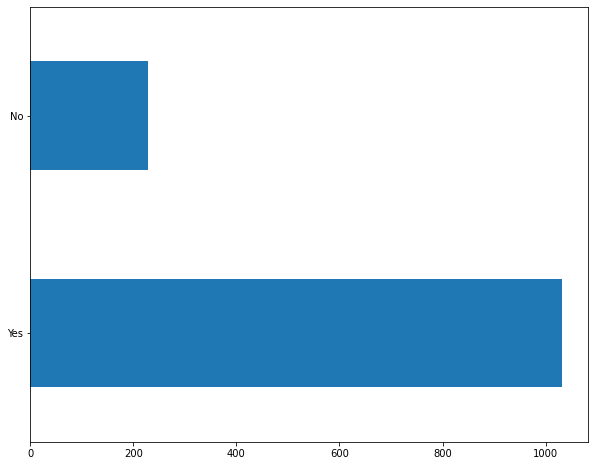

In [54]:
pd.value_counts(df['tech_company']).plot.barh(figsize=(10,8))

In [70]:
def analyze_column(col):
    
    display(
        'Missing value',
        '*************************',
        df[col].isnull().sum(),
        'Value count',
        '*************************',
        df[col].value_counts())

    pd.value_counts(df[col]).plot.barh(figsize=(10,8))
    

'Missing value'

'*************************'

0

'Value count'

'*************************'

No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64

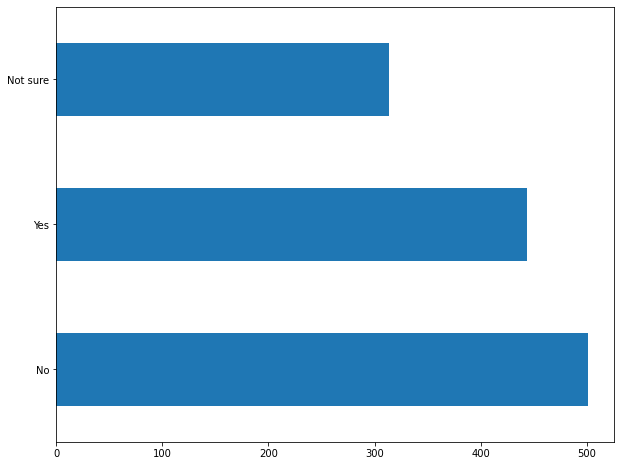

In [71]:
analyze_column('care_options')

'Missing value'

'*************************'

0

'Value count'

'*************************'

No            646
Don't know    363
Yes           250
Name: seek_help, dtype: int64

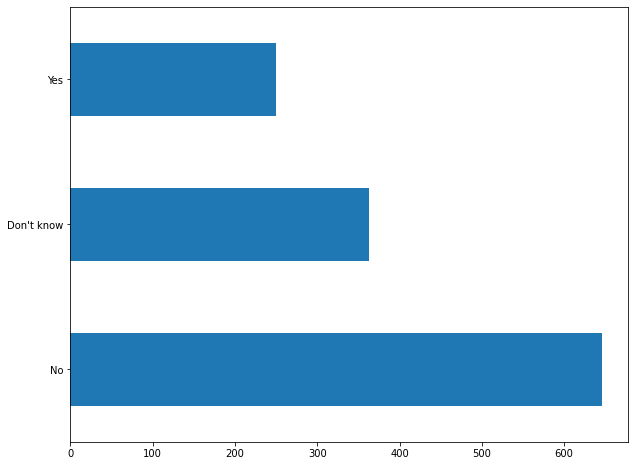

In [72]:
analyze_column('seek_help')

'Missing value'

'*************************'

0

'Value count'

'*************************'

Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64

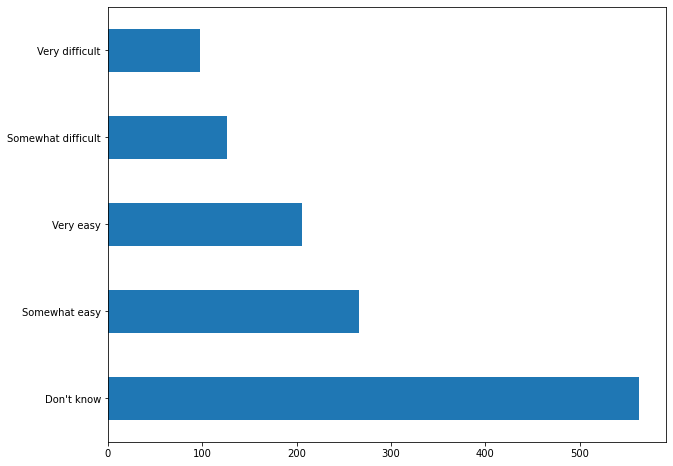

In [73]:
analyze_column('leave')

'Missing value'

'*************************'

0

'Value count'

'*************************'

No       925
Maybe    273
Yes       61
Name: phys_health_consequence, dtype: int64

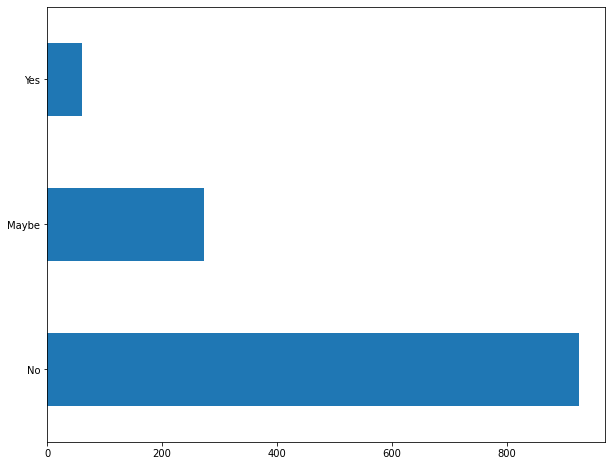

In [76]:
analyze_column('phys_health_consequence')

'Missing value'

'*************************'

0

'Value count'

'*************************'

Yes             516
No              393
Some of them    350
Name: supervisor, dtype: int64

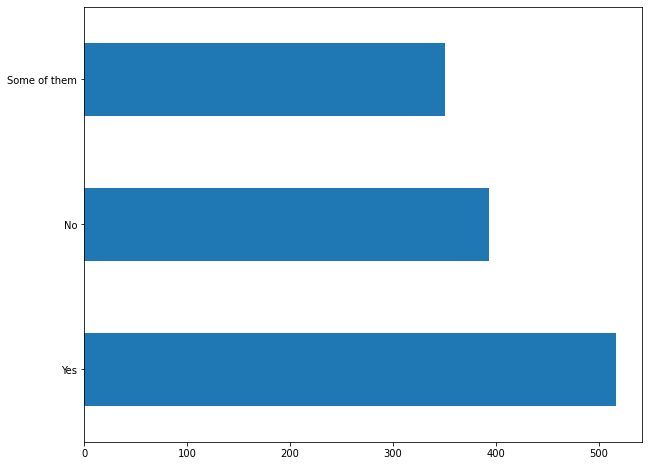

In [77]:
analyze_column('supervisor')

'Missing value'

'*************************'

0

'Value count'

'*************************'

Maybe    557
No       500
Yes      202
Name: phys_health_interview, dtype: int64

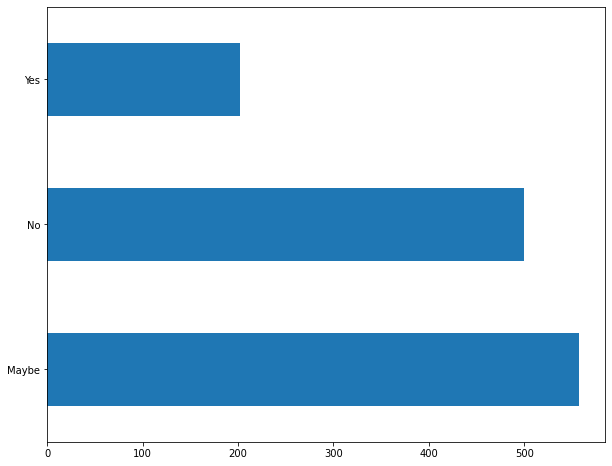

In [78]:
analyze_column('phys_health_interview')

'Missing value'

'*************************'

0

'Value count'

'*************************'

No     1075
Yes     184
Name: obs_consequence, dtype: int64

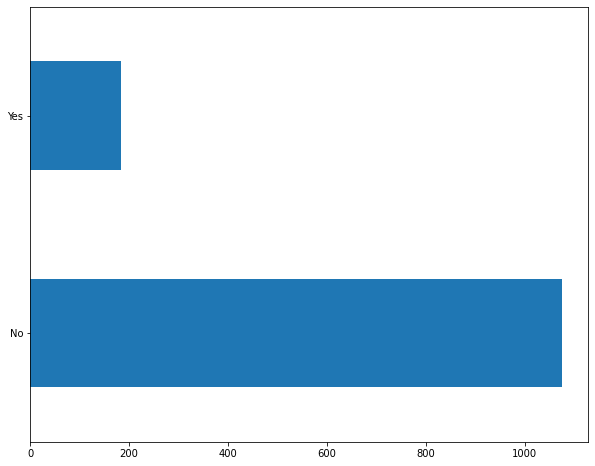

In [79]:
analyze_column('obs_consequence')

'Missing value'

'*************************'

0

'Value count'

'*************************'

Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64

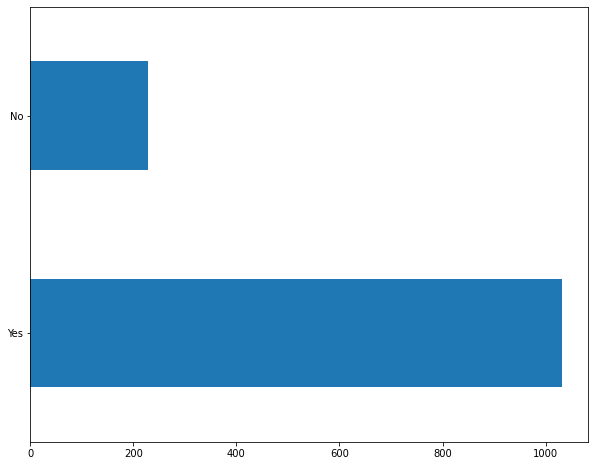

In [69]:
analyze_column('leave')